In [71]:
import os
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [73]:
df = pd.read_csv("../lyrics/songs_with_filenames_and_feats_and_lang_6.csv", delimiter=";")

In [74]:
def unpack_artist_list(str_repr):
    output = []
    try:
        output.extend(eval(str_repr))
    except:
        output.append(str_repr)
    finally:
        return output

In [75]:
from itertools import combinations,permutations

In [76]:
from igraph import *

In [77]:
edges = []

In [78]:
allartists = []

In [79]:
for song, artists in df[["song_name", "artists_names"]].itertuples(index=False):
    unpackartists = unpack_artist_list(artists)
    allartists.extend(unpackartists)
    pairs = list(combinations(unpackartists,2))
    edges.extend(pairs)
allartists = list(set(allartists))

In [44]:
g = Graph()

In [45]:
g.add_vertices(allartists)

In [46]:
g.add_edges(edges)

In [47]:
simple = g.simplify()

In [48]:
largest = g.clusters().giant()

In [52]:
g.decompose()[0]

In [50]:
layout = largest.layout("large")

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
plot(largest, layout=layout, target=ax)

In [16]:
fig.savefig("coll.png", dpi=300)

In [24]:
g.degree("Laura Pausini")

28

(array([2.25e+03, 8.80e+01, 1.90e+01, 1.20e+01, 8.00e+00, 4.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([  0. ,  16.4,  32.8,  49.2,  65.6,  82. ,  98.4, 114.8, 131.2,
        147.6, 164. ]),
 <BarContainer object of 10 artists>)

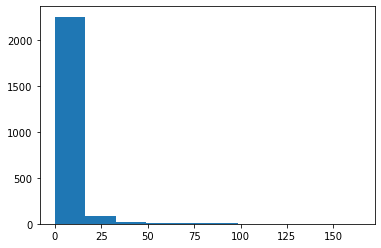

In [25]:
plt.hist(g.degree())

In [26]:
max(g.degree())

164

In [21]:
g.vs.select(_degree_gt = 2)

In [22]:
g.vs.select(_degree=g.maxdegree())["name"]

['Guè Pequeno']

In [23]:
#g.shortest_paths()

In [66]:
from pyvis.network import Network
import networkx as nx

In [102]:
G = nx.Graph()

In [103]:
G.add_nodes_from(allartists)

In [104]:
G.add_edges_from(edges)

In [106]:
giant = max(nx.connected_component_subgraphs(G), key=len)

In [96]:
from networkx.algorithms.components import number_connected_components

In [105]:
G.graph

{}

In [108]:
nt = Network('1280px', '720px')
# populates the nodes and edges data structures
nt.from_nx(giant)
nt.show_buttons()
nt.show('nx.html')